# Análise Exploratória dos dados

- **Disciplina**: Redes Neurais Artificiais 2022.2  
- **Professora**: Elloá B. Guedes         

## Apresentação

Contextualizar o problema

Falar do objetivo do notebook

### **Equipe**:
- Melinne Diniz de Oliveira (2115310021)
- Arthur Uguen Mendonça (21153100XX)

**Atributo alvo**: PCOS

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from pearson_correlation import choose_with_pearson

In [2]:
data = pd.read_csv('data/PCOS_data.csv')

### Conhecendo o dataset

In [3]:
data.head(5)

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.9,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.3,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.7,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.1,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [20]:
data["RBS(mg/dl)"]

0       92.0
1       92.0
2       84.0
3       76.0
4       84.0
       ...  
536     92.0
537    108.0
538     92.0
539    115.0
540    108.0
Name: RBS(mg/dl), Length: 538, dtype: float64

In [4]:
print(len(data))
print(data.shape)

541
(541, 45)


In [5]:
del data["Unnamed: 44"]
data.dropna(inplace=True)
data = data.replace({'1.99.': 1.99})
del data["Sl. No"]
del data["Patient File No."]

data.drop([305], inplace=True)
data['II    beta-HCG(mIU/mL)'] = pd.to_numeric(data['II    beta-HCG(mIU/mL)'])
data['AMH(ng/mL)'] = pd.to_numeric(data['AMH(ng/mL)'])

In [6]:
data

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.000,19.3,15,78,22,10.48,2,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.500,24.9,15,74,20,11.70,2,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.000,25.3,11,72,18,11.80,2,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.000,29.7,13,72,20,12.00,2,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.000,20.1,11,72,18,10.00,2,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0,35,50.0,164.592,18.5,17,72,16,11.00,2,...,0,0.0,0,110,70,1,0,17.5,10.0,6.7
537,0,30,63.2,158.000,25.3,15,72,18,10.80,2,...,0,0.0,0,110,70,9,7,19.0,18.0,8.2
538,0,36,54.0,152.000,23.4,13,74,20,10.80,2,...,0,0.0,0,110,80,1,0,18.0,9.0,7.3
539,0,27,50.0,150.000,22.2,15,74,20,12.00,4,...,1,0.0,0,110,70,7,6,18.0,16.0,11.5


In [7]:
print(f'exemplos de pacientes que tem diagnóstico de POCs: {len(data[data["PCOS (Y/N)"] == 1])}')
print(f'exemplos de pacientes que NÃO tem diagnóstico de PCOs: {len(data[data["PCOS (Y/N)"] == 0])}')

exemplos de pacientes que tem diagnóstico de POCs: 176
exemplos de pacientes que NÃO tem diagnóstico de PCOs: 362


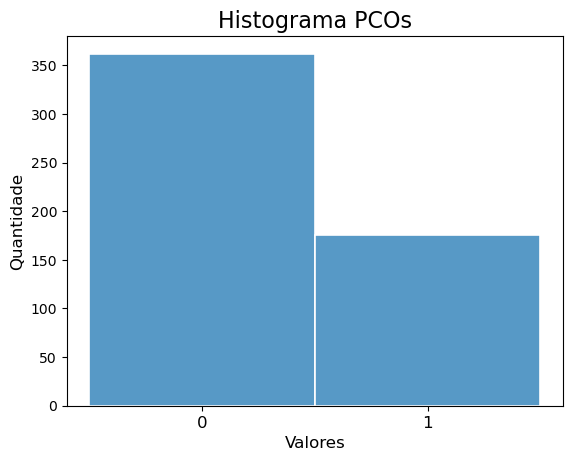

In [8]:
pcos = data["PCOS (Y/N)"]

sns.histplot(pcos, bins=2, discrete=True, edgecolor='white', linewidth=1.2)

plt.xticks([0, 1], fontsize=12)  
plt.xlabel('Valores', fontsize=12)
plt.ylabel('Quantidade', fontsize=12) 
plt.title('Histograma PCOs', fontsize=16)

# display the plot
plt.show()


In [9]:
print(data.dtypes)

PCOS (Y/N)                  int64
 Age (yrs)                  int64
Weight (Kg)               float64
Height(Cm)                float64
BMI                       float64
Blood Group                 int64
Pulse rate(bpm)             int64
RR (breaths/min)            int64
Hb(g/dl)                  float64
Cycle(R/I)                  int64
Cycle length(days)          int64
Marraige Status (Yrs)     float64
Pregnant(Y/N)               int64
No. of abortions            int64
  I   beta-HCG(mIU/mL)    float64
II    beta-HCG(mIU/mL)    float64
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
FSH/LH                    float64
Hip(inch)                   int64
Waist(inch)                 int64
Waist:Hip Ratio           float64
TSH (mIU/L)               float64
AMH(ng/mL)                float64
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)                float64
RBS(mg/dl)                float64
Weight gain(Y/N)            int64
hair growth(Y/

In [10]:
X = data.drop(columns=["PCOS (Y/N)"], axis=1)
y = data["PCOS (Y/N)"]
X_selected, _ = choose_with_pearson(15, X, y)

In [11]:
X_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 538 entries, 0 to 540
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Follicle No. (R)      538 non-null    int64  
 1   Follicle No. (L)      538 non-null    int64  
 2   Skin darkening (Y/N)  538 non-null    int64  
 3   hair growth(Y/N)      538 non-null    int64  
 4   Weight gain(Y/N)      538 non-null    int64  
 5   Cycle(R/I)            538 non-null    int64  
 6   Fast food (Y/N)       538 non-null    float64
 7   Pimples(Y/N)          538 non-null    int64  
 8   AMH(ng/mL)            538 non-null    float64
 9   Weight (Kg)           538 non-null    float64
 10  BMI                   538 non-null    float64
 11  Cycle length(days)    538 non-null    int64  
 12  Hair loss(Y/N)        538 non-null    int64  
 13   Age (yrs)            538 non-null    int64  
 14  Waist(inch)           538 non-null    int64  
dtypes: float64(4), int64(11

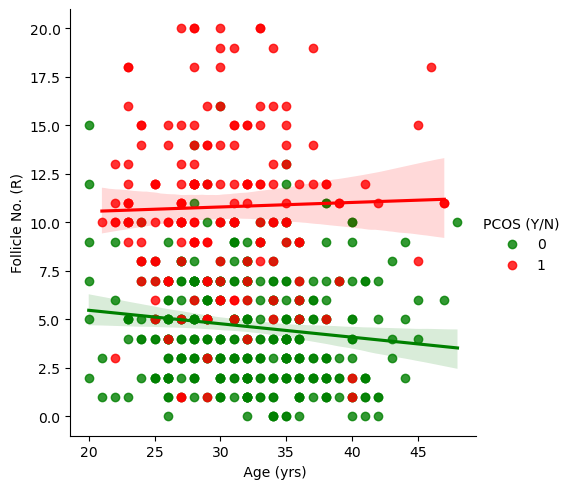

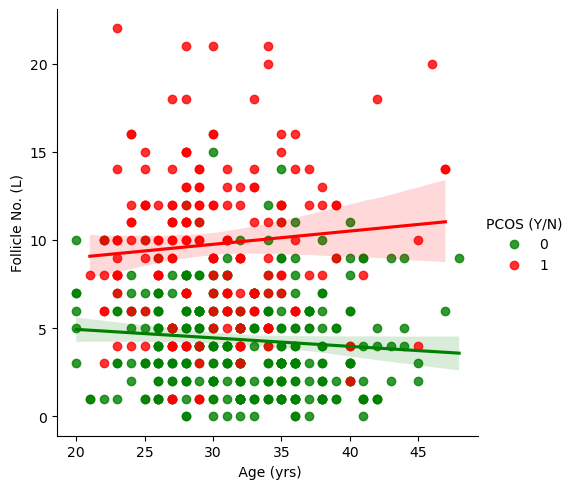

In [12]:
sns.lmplot(data=data, x=" Age (yrs)", y="Follicle No. (R)", hue="PCOS (Y/N)", palette=["green", "red"])
sns.lmplot(data=data, x=" Age (yrs)", y="Follicle No. (L)", hue="PCOS (Y/N)", palette=["green", "red"])


plt.show()

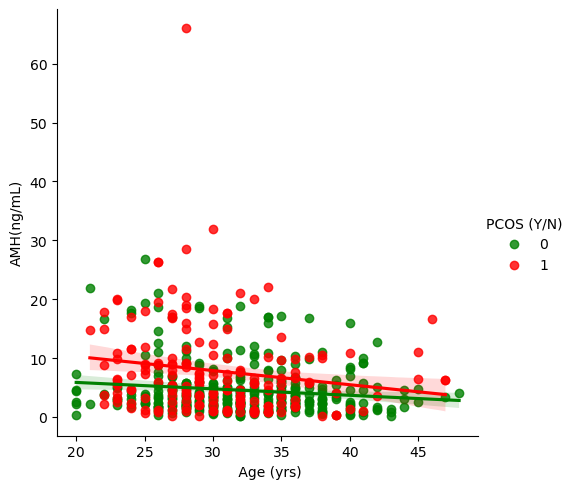

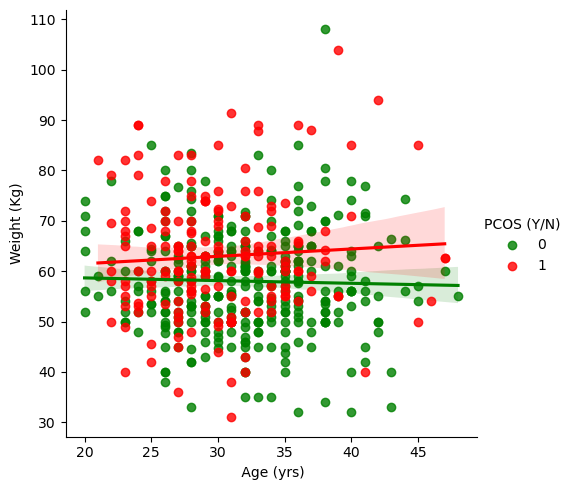

In [13]:
sns.lmplot(data=data, x=" Age (yrs)", y="AMH(ng/mL)", hue="PCOS (Y/N)", palette=["green", "red"])
sns.lmplot(data=data, x=" Age (yrs)", y="Weight (Kg)", hue="PCOS (Y/N)", palette=["green", "red"])

plt.show()

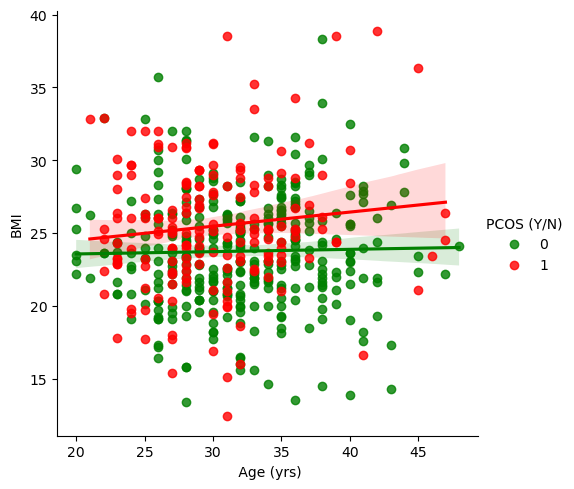

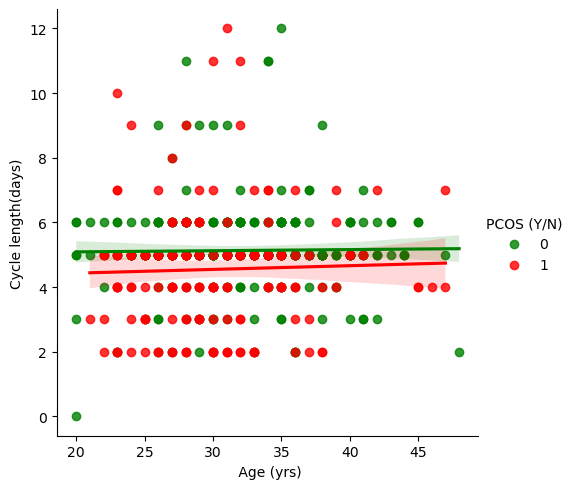

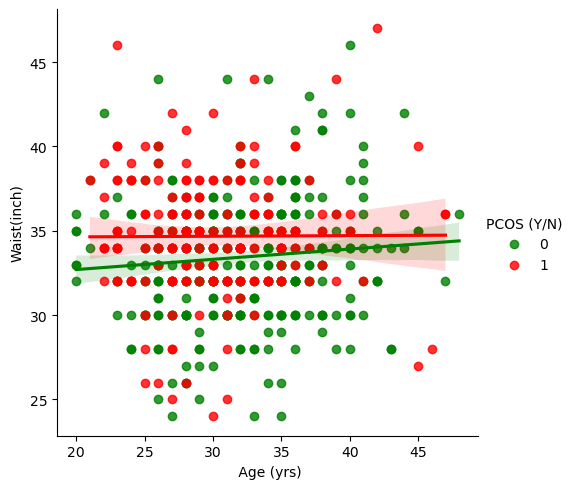

In [14]:
sns.lmplot(data=data, x=" Age (yrs)", y="BMI", hue="PCOS (Y/N)", palette=["green", "red"])
sns.lmplot(data=data, x=" Age (yrs)", y="Cycle length(days)", hue="PCOS (Y/N)", palette=["green", "red"])
sns.lmplot(data=data, x=" Age (yrs)", y="Waist(inch)", hue="PCOS (Y/N)", palette=["green", "red"])

plt.show()

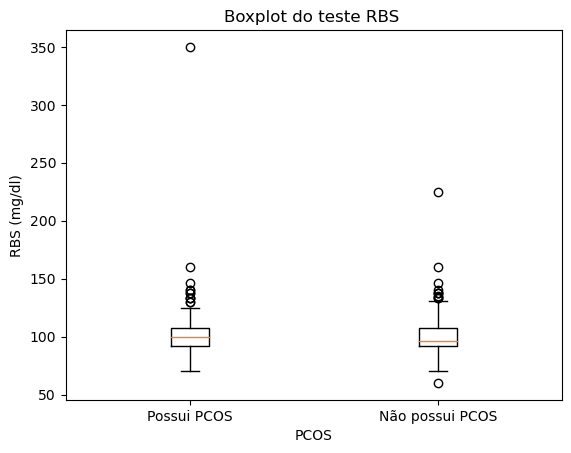

In [21]:
# Random Blood Sugar Test
plt.boxplot([data[data['PCOS (Y/N)'] == 1]['RBS(mg/dl)'], data[data['PCOS (Y/N)'] == 0]['RBS(mg/dl)']], labels=['Possui PCOS', 'Não possui PCOS'])

plt.title('Boxplot do teste RBS')
plt.xlabel('PCOS')
plt.ylabel('RBS (mg/dl)')

plt.show()

In [15]:
data.to_csv('PCOS.csv')